<a href="https://colab.research.google.com/github/maazansariX/maazansariX/blob/main/Python_Case_Study_Business_Case_of_Yulu_Analysis_%26_Insights_by_Maaz_Ansari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BUSINESS CASE: **Yulu**
PROJECT & INSIGHTS ON PYTHON BY: **MAAZ ANSARI**

**About Yulu**\
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

**Business Problem by Scaler & Solution by Maaz Ansari**\
The company wants to know:
- Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
- How well those variables describe the electric cycle demands




Dataset_link -> https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

## **Schema of Data:**

* **datetime**     : datetime
* **season**		   : season (1: spring, 2: summer, 3: fall, 4: winter)
* **holiday**		   : whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
* **workingday**	 : if day is neither weekend nor holiday is 1, otherwise is 0.
* **weather**	     :
          1: Clear, Few clouds, partly cloudy, partly cloudy
          2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
          3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
          4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

* **temp**	      : temperature in Celsius
* **atemp**	      : feeling temperature in Celsius
* **humidity**    : humidity
* **windspeed**	  : wind speed
* **casual**	    : count of casual users
* **registered**	: count of registered users
* **count**       : count of total rental bikes including both casual and registered

# **Concept Used:**
- Bi-Variate Analysis
- 2-sample t-test: testing for difference across populations
- ANNOVA
- Chi-square


**How to begin:**

1. Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset
2. Try establishing a relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday, Weather, Season etc)
3. Select an appropriate test to check whether:
  - Working Day has effect on number of electric cycles rented
  - No. of cycles rented similar or different in different seasons
  - No. of cycles rented similar or different in different weather
  - Weather is dependent on season (check between 2 predictor variable)
4. Set up Null Hypothesis (H0)
5. State the alternate hypothesis (H1)
6. Check assumptions of the test (Normality, Equal Variance). You can check it using Histogram, Q-Q plot or statistical methods like levene’s test, Shapiro-wilk test (optional)
  - Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary
7. Set a significance level (alpha)
8. Calculate test Statistics.
9. Decision to accept or reject null hypothesis.
10. Inference from the analysis


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset**

**A. Import Dataset**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving bike_sharing.csv to bike_sharing (1).csv


In [4]:
yulu = pd.read_csv("bike_sharing.csv")

**B. Exploratory Analysis**

1. Data Observation (Top & Bottom Dataset)

In [5]:
yulu.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
yulu.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


**B. Exploratory Analysis**

2. Data Shape & Information

In [7]:
yulu.shape

(10886, 12)

**Observations:**

- Rows: 10886
- Columns: 12

In [8]:
yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


**Observations:**

- No Non-null values in any of 12 columns
- Except datetime, all other columns are numeric format, need to review if we need to reset format of any of these columns
- For analysis, dissect into categorical and numerical columns appropriately.

**B. Exploratory Analysis**

3. Data Type Conversion
  - datetime: It should be in datetime format
  - Columns like season, holiday, workingday, weather should be in categorical format as they are categorical in nature

In [9]:
#Type Conversion

yulu["datetime"] = pd.to_datetime(yulu["datetime"])
yulu["season"] = yulu["season"].map(str)
yulu["holiday"] = yulu["holiday"].map(str)
yulu["workingday"] = yulu["workingday"].map(str)
yulu["weather"] = yulu["weather"].map(str)

**B. Exploratory Analysis**

4. Data Mapping of Categorical variables

In [10]:
yulu["season"].unique()

array(['1', '2', '3', '4'], dtype=object)

In [11]:
yulu["holiday"].unique()

array(['0', '1'], dtype=object)

In [12]:
yulu["workingday"].unique()

array(['0', '1'], dtype=object)

In [13]:
yulu["weather"].unique()

array(['1', '2', '3', '4'], dtype=object)

In [14]:
#Data mapping

season_mapping = {'1':'spring', '2':'summer', '3':'fall', '4':'winter'}
yulu["season"] = yulu["season"].map(lambda x: season_mapping[x])

holiday_mapping = {'0': 'no', '1': 'yes'}
yulu["holiday"] = yulu["holiday"].map(lambda x: holiday_mapping[x])

workingday_mapping = {'0': 'no', '1': 'yes'}
yulu["workingday"] = yulu["workingday"].map(lambda x: workingday_mapping[x])

weather_mapping = {'1': 'clear', '2': 'mist', '3': 'rain', '4': 'extreme'}
yulu["weather"] = yulu["weather"].map(lambda x: weather_mapping[x])

In [15]:
yulu.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,no,no,clear,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,no,no,clear,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,no,no,clear,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,no,no,clear,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,no,no,clear,9.84,14.395,75,0.0,0,1,1


**Observations:**

- Columns like season, holiday, workingday and weather are converted into categorical columns. This will help review and evaluate Dependent and Independent columns.


**B. Exploratory Analysis**

5. Data Pre-processing - Summary of Dataset with Categorical and Numerical columns

In [16]:
yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [17]:
yulu.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


**Observations:**

1. Average Temperature is 20, minimum temperature is 1 and maximum temperature is around 41.
2. Average Humidity is around 61, min = 0, max = 100.
3. Average Wind speed is 13, min = 0, max = 56.
4. Average no. of users who availed Yulu services on a given day is around 191, min 1 in a day and max at 977.

In [18]:
yulu.describe(include = ["object", "datetime64[ns]"])

<ipython-input-18-b8a8d9b3f532>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  yulu.describe(include = ["object", "datetime64[ns]"])


,datetime,season,holiday,workingday,weather
count,10886,10886,10886,10886,10886
unique,10886,4,2,2,4
top,2011-01-01 00:00:00,winter,no,yes,clear
freq,1,2734,10575,7412,7192
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN
last,2012-12-19 23:00:00,NaN,NaN,NaN,NaN


**Observations:**

1. Services of Yulu for this dataset is between 1st Jan 2011 to 19 Dec 2012.
2. Top season when users availed services is winter.
3. Mostly users availed services when weather was clear.
4. Based on the dataset review, it doesn't matter it is holiday or working day, users were utilizing the Yulu service.

**B. Exploratory Analysis**

6. Unique Values in the dataset by Columns

In [19]:
for i in yulu.columns:
  print(f"{i} has:\n{yulu[i].nunique()} unique values")

datetime has:
10886 unique values
season has:
4 unique values
holiday has:
2 unique values
workingday has:
2 unique values
weather has:
4 unique values
temp has:
49 unique values
atemp has:
60 unique values
humidity has:
89 unique values
windspeed has:
28 unique values
casual has:
309 unique values
registered has:
731 unique values
count has:
822 unique values


**B. Exploratory Analysis**

7. Duplicate Check for Rows

In [20]:
yulu.duplicated().any()

False

**Observations:**

Based on above code, there are no duplicate values in the dataset.

# **2. Try establishing a relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday, Weather, Season etc)**

**C. Univariate Analysis**

1. Categorical Columns

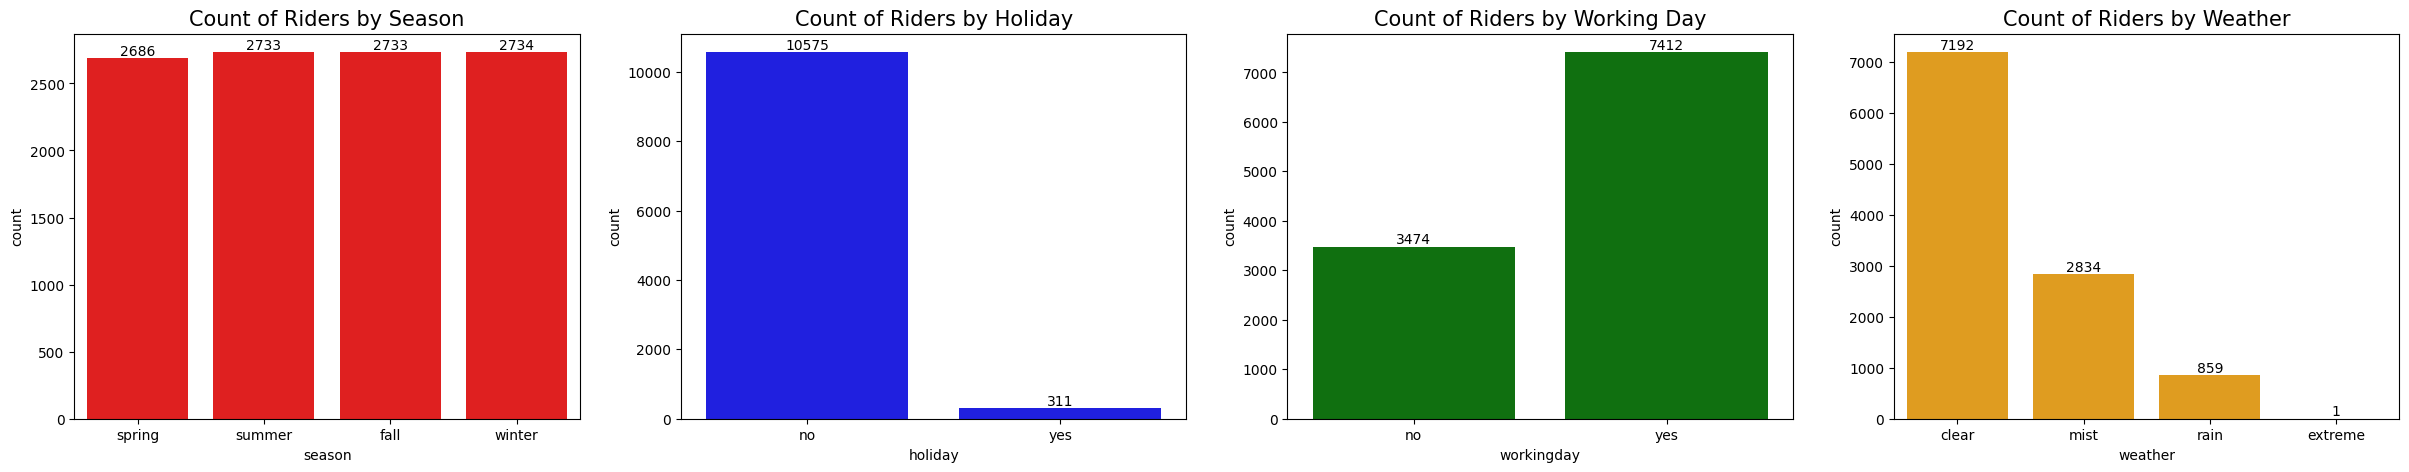

In [21]:
fig,axes=plt.subplots(nrows=1, ncols=4, figsize=(30,5))
sns.countplot(x='season', data=yulu, ax=axes[0], color = "red")
axes[0].bar_label(axes[0].containers[0])
axes[0].set_title('Count of Riders by Season',fontsize = 15)
sns.countplot(x='holiday', data=yulu, ax=axes[1], color = "blue")
axes[1].bar_label(axes[1].containers[0])
axes[1].set_title('Count of Riders by Holiday',fontsize = 15)
sns.countplot(x='workingday', data=yulu, ax=axes[2], color = "green")
axes[2].bar_label(axes[2].containers[0])
axes[2].set_title('Count of Riders by Working Day',fontsize = 15)
sns.countplot(x='weather', data=yulu, ax=axes[3], color = "orange")
axes[3].bar_label(axes[3].containers[0])
axes[3].set_title('Count of Riders by Weather',fontsize = 15)
plt.show()

In [22]:
season_count = yulu["season"].value_counts().reset_index()
season_count.rename(columns = {'index':'Season','season':'Season_Count'}, inplace = True)
season_count["Season_%"] = season_count.apply(lambda x: np.round(x['Season_Count']/len(yulu)*100,2), axis = 1)
season_count

,Season,Season_Count,Season_%
0,winter,2734,25.11
1,summer,2733,25.11
2,fall,2733,25.11
3,spring,2686,24.67


In [23]:
holiday_count = yulu["holiday"].value_counts().reset_index()
holiday_count.rename(columns = {'index':'Holiday','holiday':'Holiday_Count'}, inplace = True)
holiday_count["Holiday_%"] = holiday_count.apply(lambda x: np.round(x['Holiday_Count']/len(yulu)*100,2), axis = 1)
holiday_count

,Holiday,Holiday_Count,Holiday_%
0,no,10575,97.14
1,yes,311,2.86


In [24]:
workingday_count = yulu["workingday"].value_counts().reset_index()
workingday_count.rename(columns = {'index':'WorkingDay','workingday':'WorkingDay_Count'}, inplace = True)
workingday_count["WorkingDay_%"] = workingday_count.apply(lambda x: np.round(x['WorkingDay_Count']/len(yulu)*100,2), axis = 1)
workingday_count

,WorkingDay,WorkingDay_Count,WorkingDay_%
0,yes,7412,68.09
1,no,3474,31.91


In [25]:
weather_count = yulu["weather"].value_counts().reset_index()
weather_count.rename(columns = {'index':'Weather','weather':'Weather_Count'}, inplace = True)
weather_count["Weather_%"] = weather_count.apply(lambda x: np.round(x['Weather_Count']/len(yulu)*100,2), axis = 1)
weather_count

,Weather,Weather_Count,Weather_%
0,clear,7192,66.07
1,mist,2834,26.03
2,rain,859,7.89
3,extreme,1,0.01


**Observations:**

1. No. of Riders is almost the same across seasons, however, in one of the above analysis under describe function, winter had highest.
2. More no. of Riders (97% of them) ride on non-holiday period.
3. More no. of Riders (68% of them) ride on working days.
4. More no. of Riders (66% of them) ride during clear weather skyline.

**C. Univariate Analysis**

2. Continuous columns

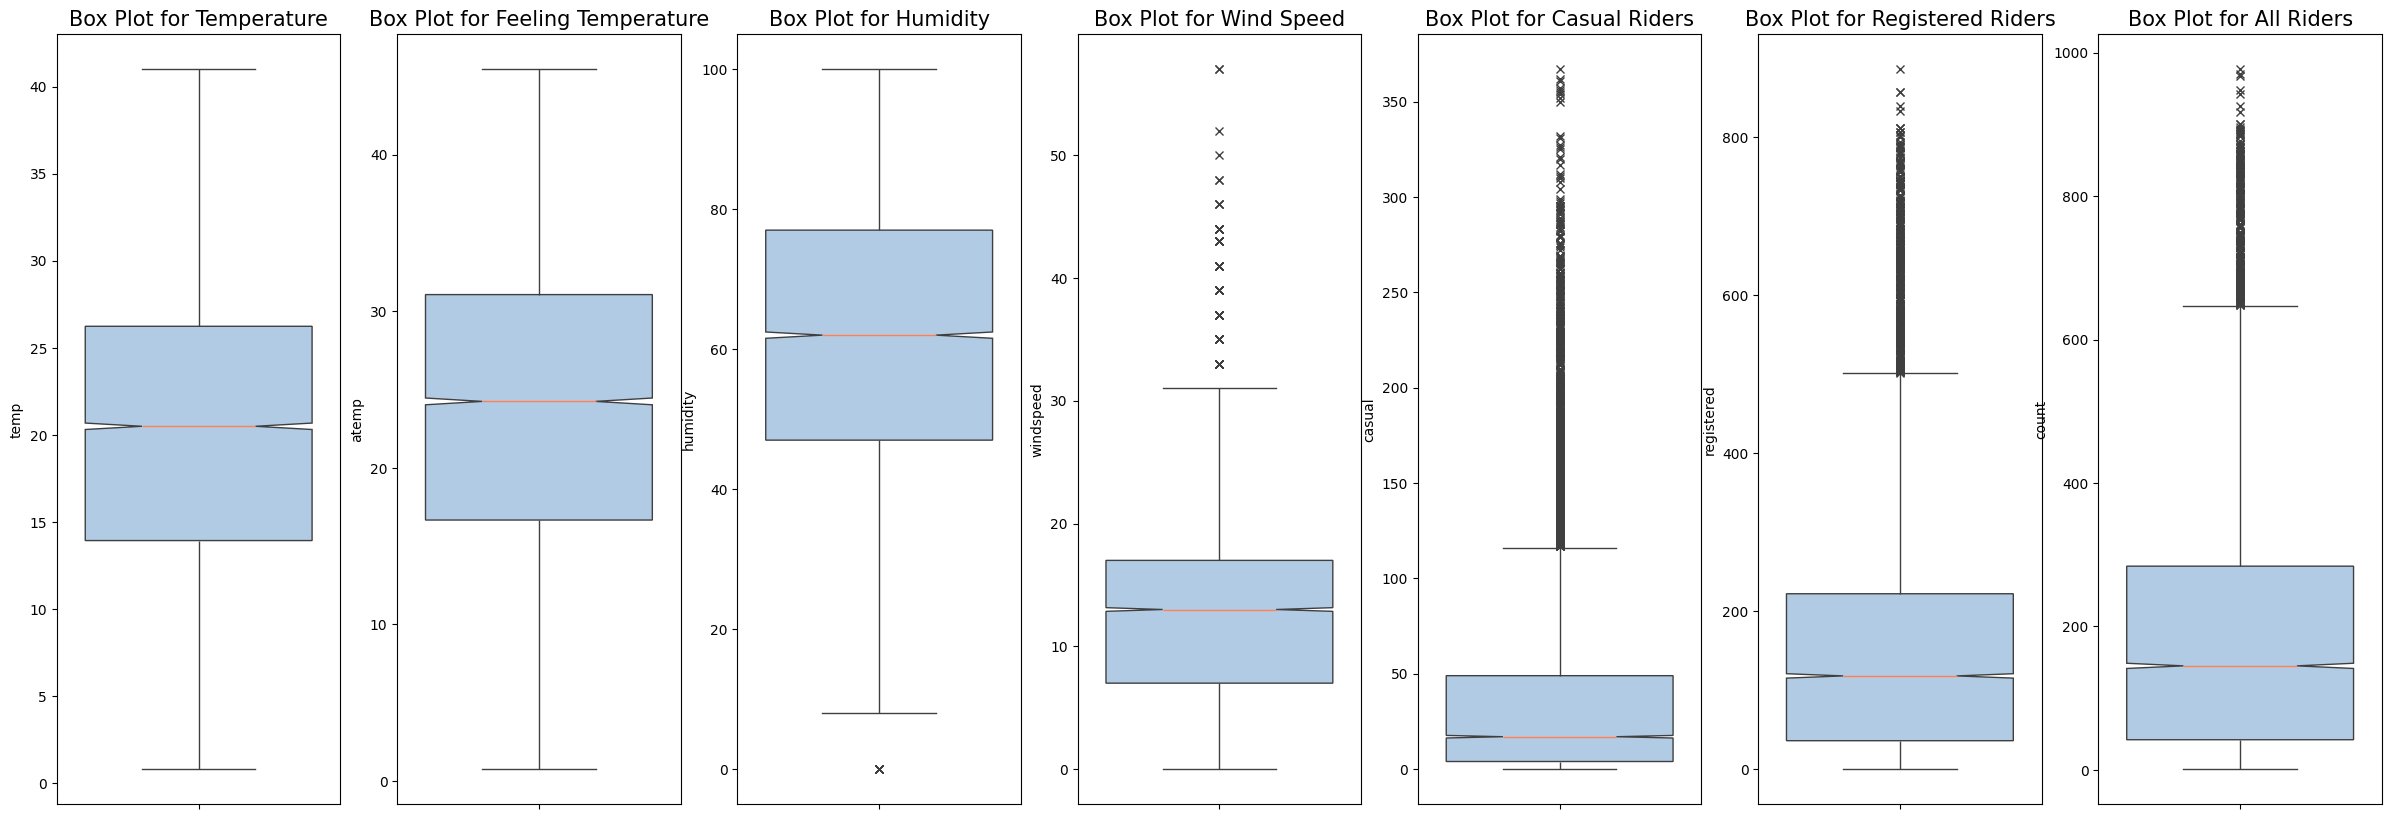

In [26]:
fig, axes = plt.subplots(1,7, figsize = (30,10))

sns.boxplot(data = yulu, y = 'temp', ax  = axes[0],
            notch = True, showcaps = True,
            flierprops = {"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"}
           )
axes[0].set_title('Box Plot for Temperature', fontsize = 15)

sns.boxplot(data = yulu, y = 'atemp', ax  = axes[1],
            notch = True, showcaps = True,
            flierprops = {"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"}
           )
axes[1].set_title('Box Plot for Feeling Temperature', fontsize = 15)

sns.boxplot(data = yulu, y = 'humidity', ax  = axes[2],
            notch = True, showcaps = True,
            flierprops = {"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"}
           )
axes[2].set_title('Box Plot for Humidity', fontsize = 15)

sns.boxplot(data = yulu, y = 'windspeed', ax  = axes[3],
            notch = True, showcaps = True,
            flierprops = {"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"}
           )
axes[3].set_title('Box Plot for Wind Speed', fontsize = 15)

sns.boxplot(data = yulu, y = 'casual', ax  = axes[4],
            notch = True, showcaps = True,
            flierprops = {"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"}
           )
axes[4].set_title('Box Plot for Casual Riders', fontsize = 15)

sns.boxplot(data = yulu, y = 'registered', ax  = axes[5],
            notch = True, showcaps = True,
            flierprops = {"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"}
           )
axes[5].set_title('Box Plot for Registered Riders', fontsize = 15)

sns.boxplot(data = yulu, y = 'count', ax  = axes[6],
            notch = True, showcaps = True,
            flierprops = {"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"}
           )
axes[6].set_title('Box Plot for All Riders', fontsize = 15)
plt.show()

**Observations:**

1. Mean and median temperatures are around 20°C.
2. For Feeling Temperature, mean and median is around 24°C.
3. Mean and median Humidity is approximately around 62%.
4. Wind speed is around 13 Km/hr with number of outliers between 30 & 60.
5. Based on the distinction of casual & registered riders, casual has mean and median around 20 in count vs. registered having mean and median around 160. If we look at overall no. of riders, mean and median falls between 150-200.

Follow-up: Need to investigate little further on the No. of riders availing Yulu services.

**C. Bivariate Analysis**

1. Increase in Casual, Registered & Total Riders over time

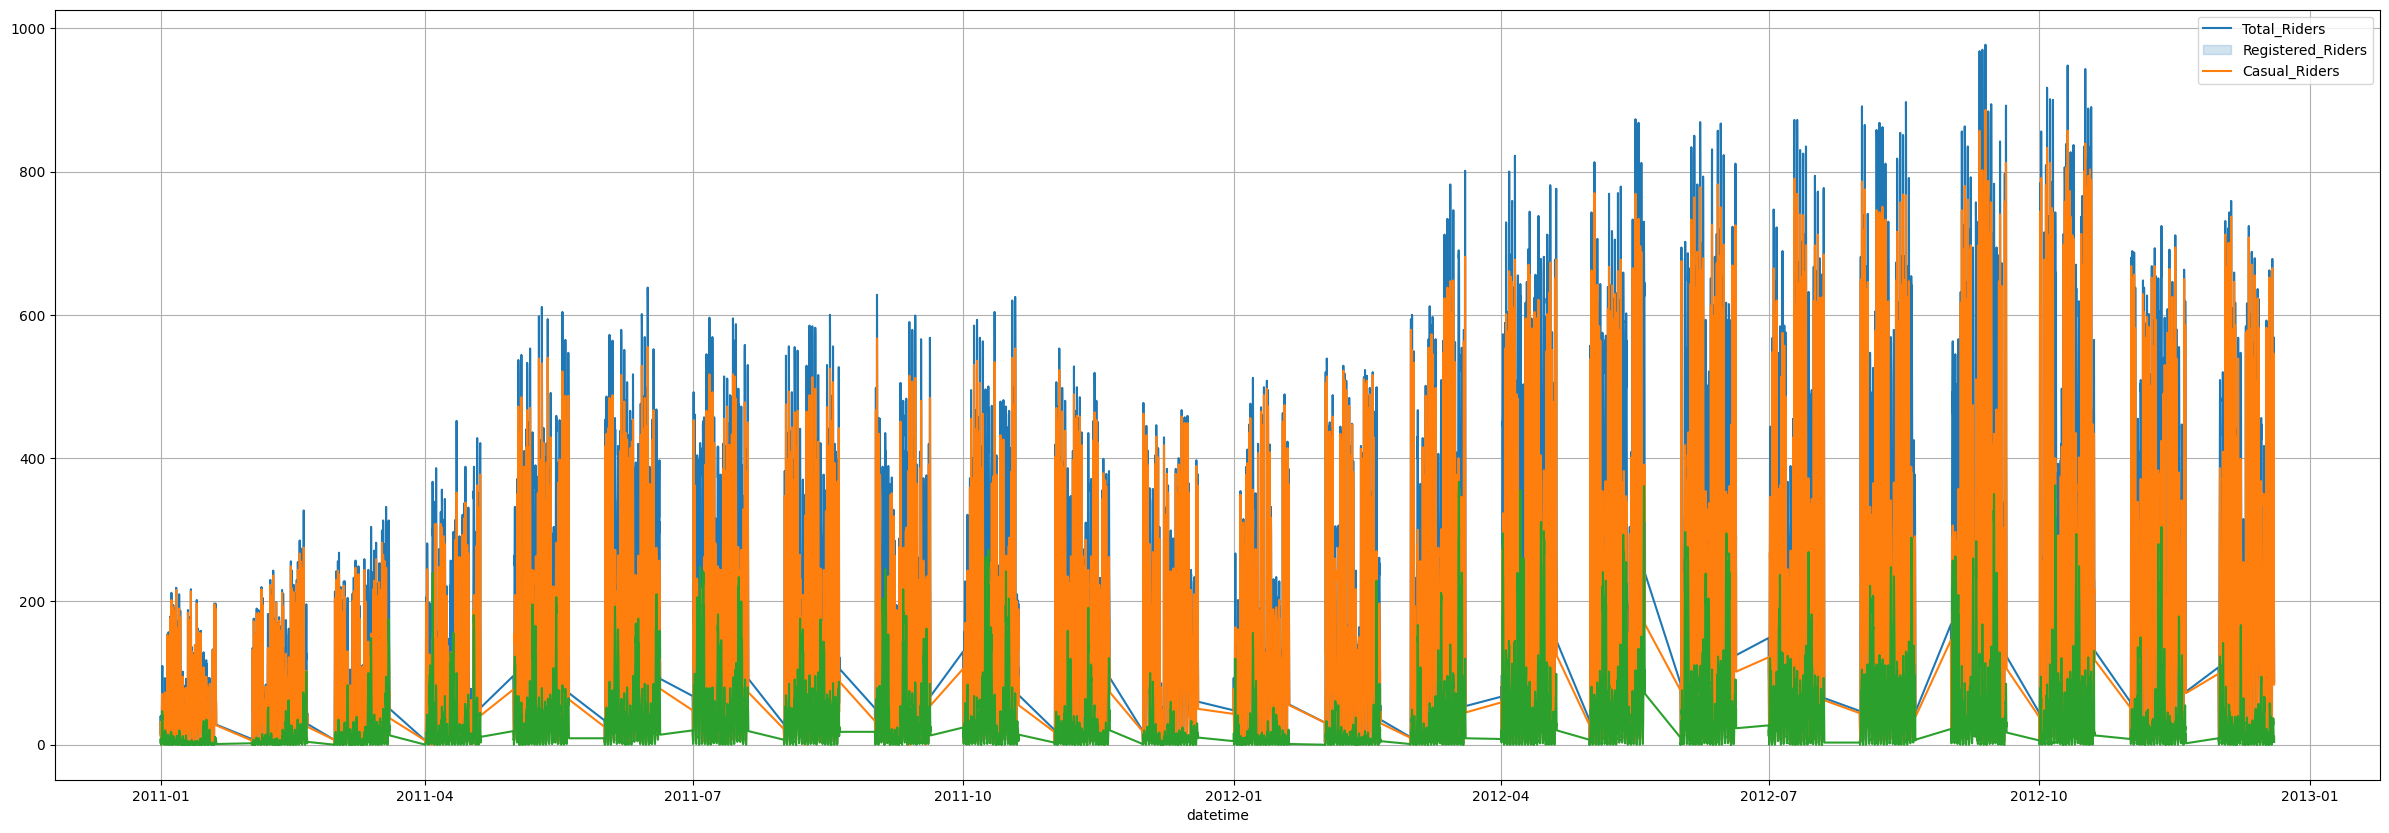

In [27]:
plt.figure(figsize=(30,10))
sns.color_palette('Paired')

sns.lineplot(x = yulu['datetime'],y = yulu['count'].values)
sns.lineplot(x = yulu['datetime'],y = yulu['registered'].values)
sns.lineplot(x = yulu['datetime'],y = yulu['casual'].values)
plt.legend(['Total_Riders','Registered_Riders','Casual_Riders'])

plt.grid()
plt.show()

**Observations:**

1. No. of riders in casual & registered has increased considerably between the 2011 & 2012.
2. There is a seasonality from Apr to Oct both in 2011 & 2012.

**C. Bivariate Analysis**

2. Distribution of Casual, Registered and Total Riders by Season

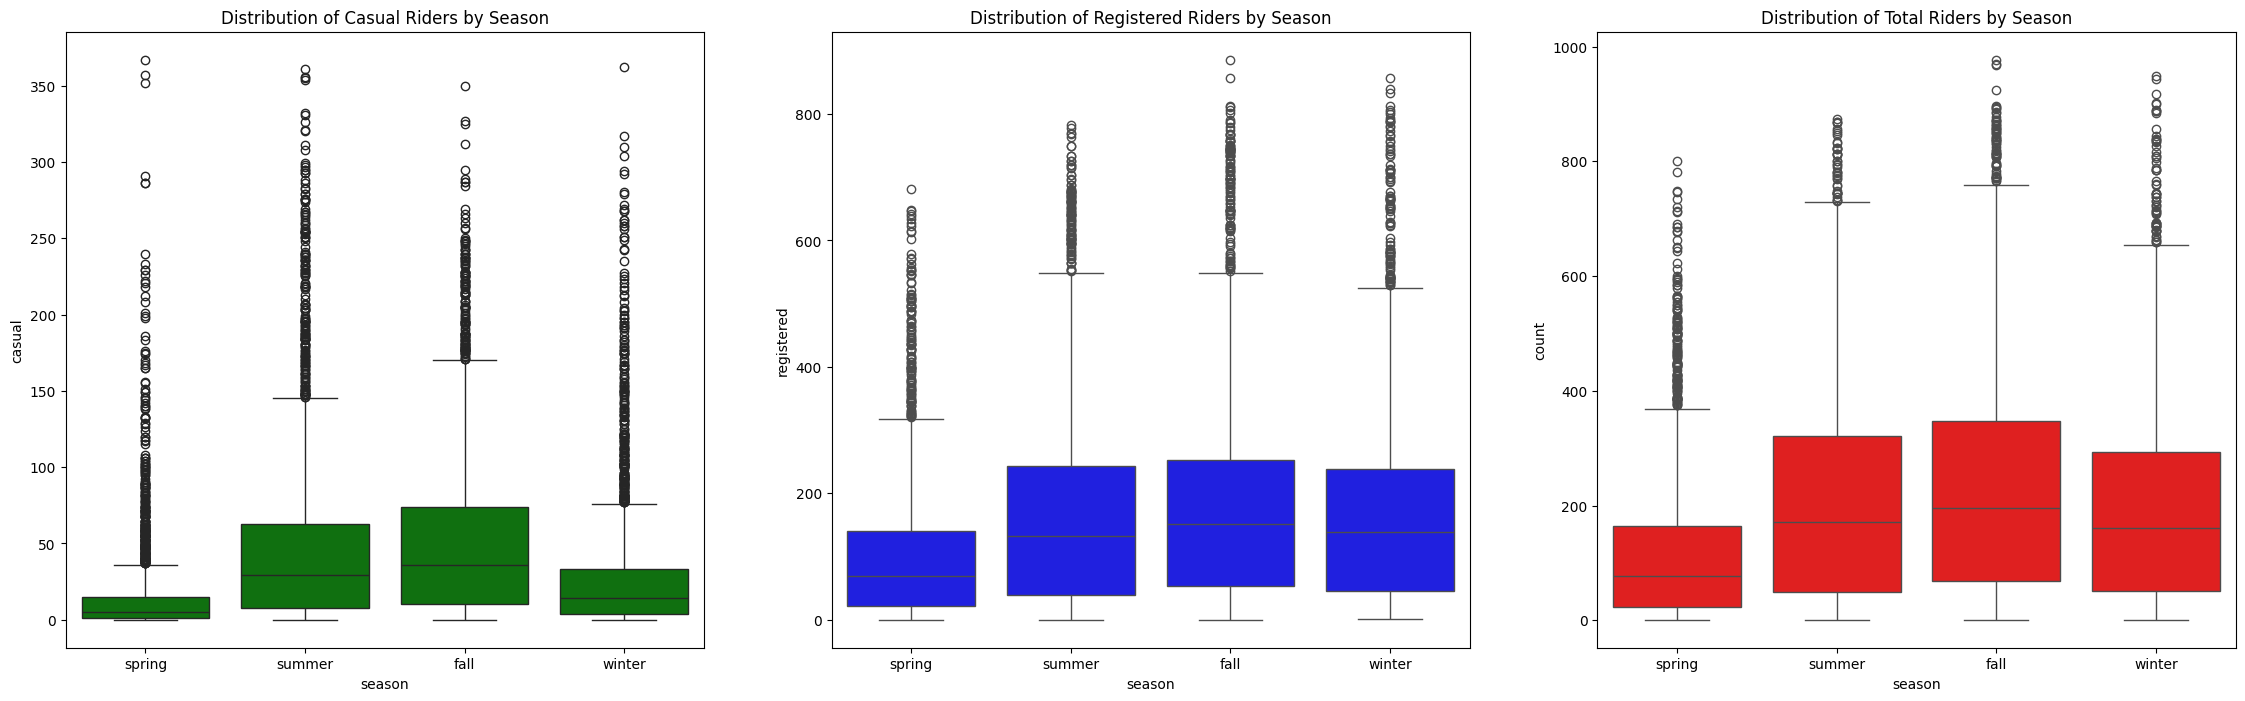

In [28]:
fig,axes=plt.subplots(1,3,figsize=(28,8))

sns.boxplot(data=yulu, y="casual", x = 'season', ax=axes[0], color = "green")
axes[0].set_title('Distribution of Casual Riders by Season')

sns.boxplot(data=yulu, y="registered", x = 'season', ax=axes[1], color = "blue")
axes[1].set_title('Distribution of Registered Riders by Season')

sns.boxplot(data=yulu, y="count", x = 'season', ax=axes[2], color = "red")
axes[2].set_title('Distribution of Total Riders by Season')

plt.show()

**Observations:**

Median of Casual & Registered users is highest in the fall & summer seasons, while it is stable in winters largely followed by low ridership in spring.

**C. Bivariate Analysis**

3. Distribution of Casual, Registered and Total Riders by Holiday

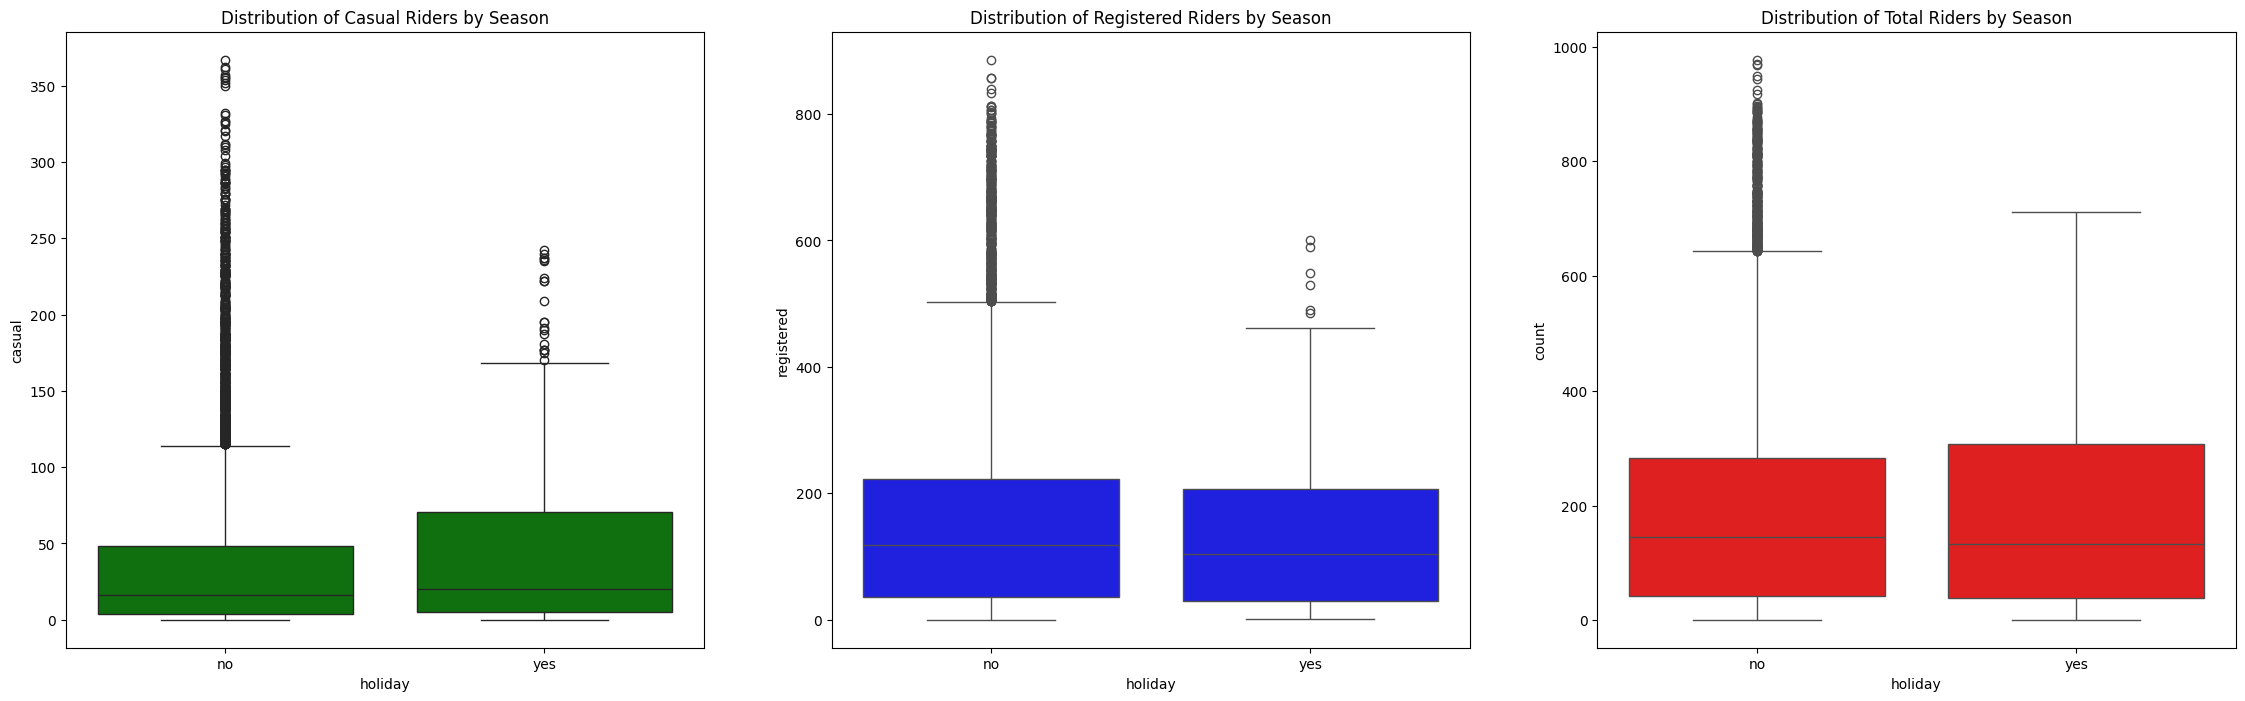

In [29]:
fig,axes=plt.subplots(1,3,figsize=(28,8))

sns.boxplot(data=yulu, y="casual", x = 'holiday', ax=axes[0], color = "green")
axes[0].set_title('Distribution of Casual Riders by Season')

sns.boxplot(data=yulu, y="registered", x = 'holiday', ax=axes[1], color = "blue")
axes[1].set_title('Distribution of Registered Riders by Season')

sns.boxplot(data=yulu, y="count", x = 'holiday', ax=axes[2], color = "red")
axes[2].set_title('Distribution of Total Riders by Season')

plt.show()

**Observations:**

1. Mean and Median of Registered riders on Holiday or No-Holiday is almost same.
2. Mean and Median of Casual riders on Holiday is higher than No-Holiday period.

**C. Bivariate Analysis**

4. Distribution of Casual, Registered and Total Riders by Working Day

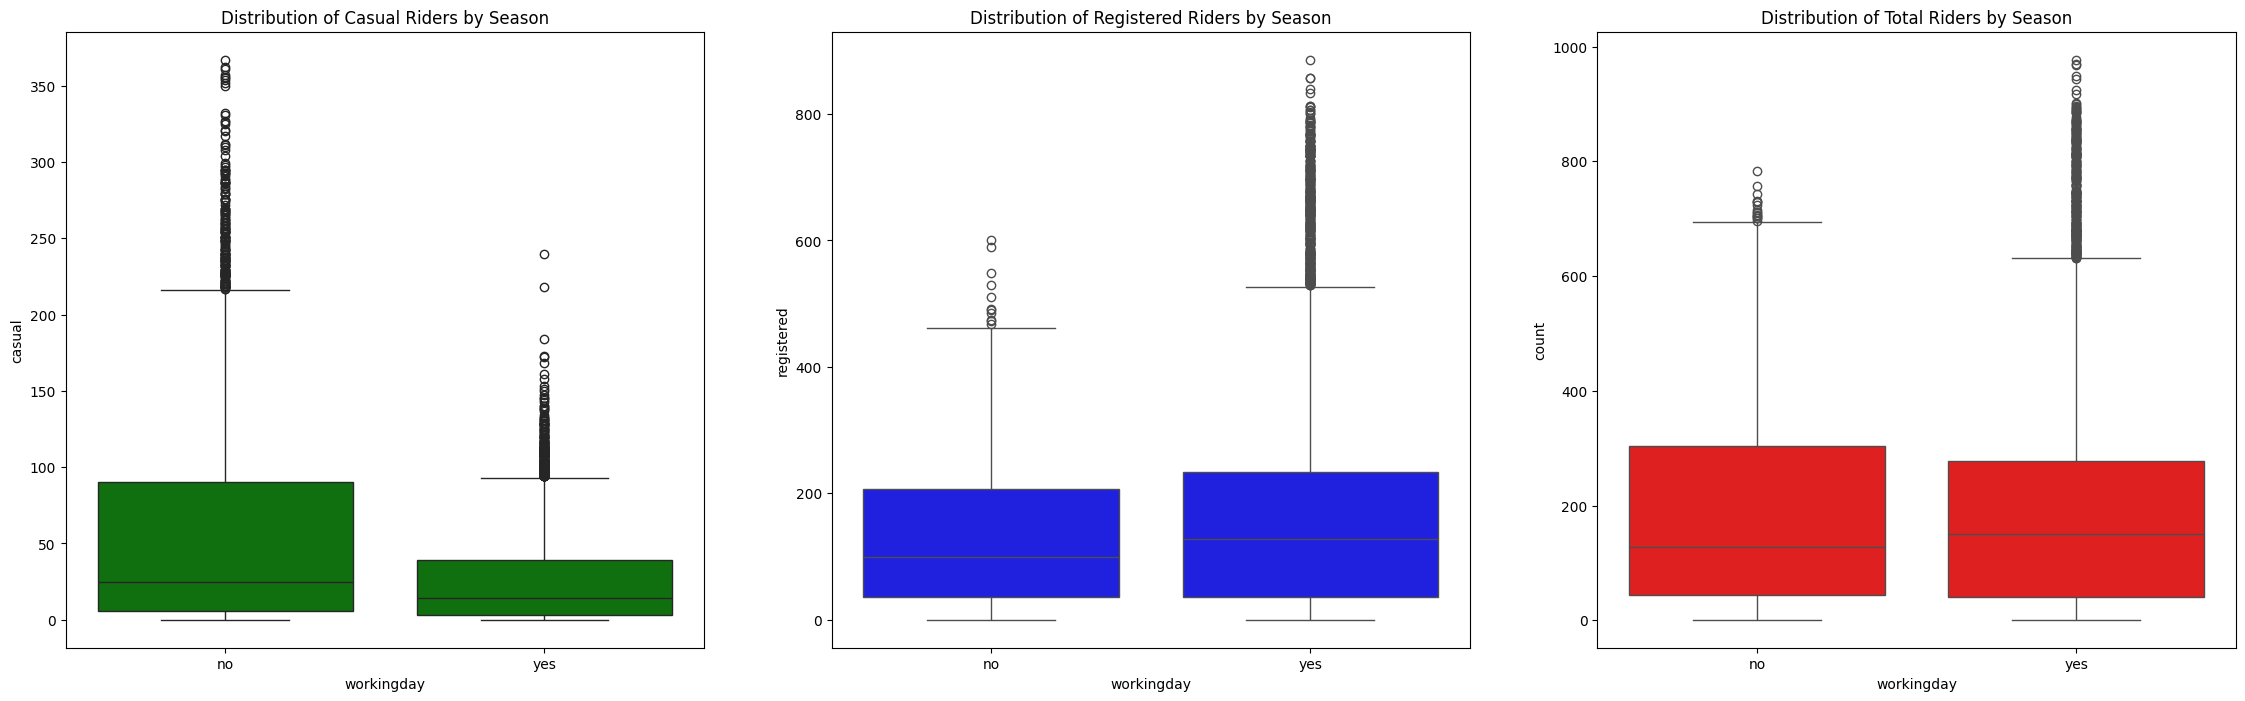

In [30]:
fig,axes=plt.subplots(1,3,figsize=(28,8))

sns.boxplot(data=yulu, y="casual", x = 'workingday', ax=axes[0], color = "green")
axes[0].set_title('Distribution of Casual Riders by Season')

sns.boxplot(data=yulu, y="registered", x = 'workingday', ax=axes[1], color = "blue")
axes[1].set_title('Distribution of Registered Riders by Season')

sns.boxplot(data=yulu, y="count", x = 'workingday', ax=axes[2], color = "red")
axes[2].set_title('Distribution of Total Riders by Season')

plt.show()

**Observations:**

1. Mean and Median of Registered riders on Working Day is higher vs. non-working day.
2. Mean and Median of Casual riders on Non-working day is higher than Working day.

**C. Bivariate Analysis**

5. Distribution of Casual, Registered and Total Riders by Weather

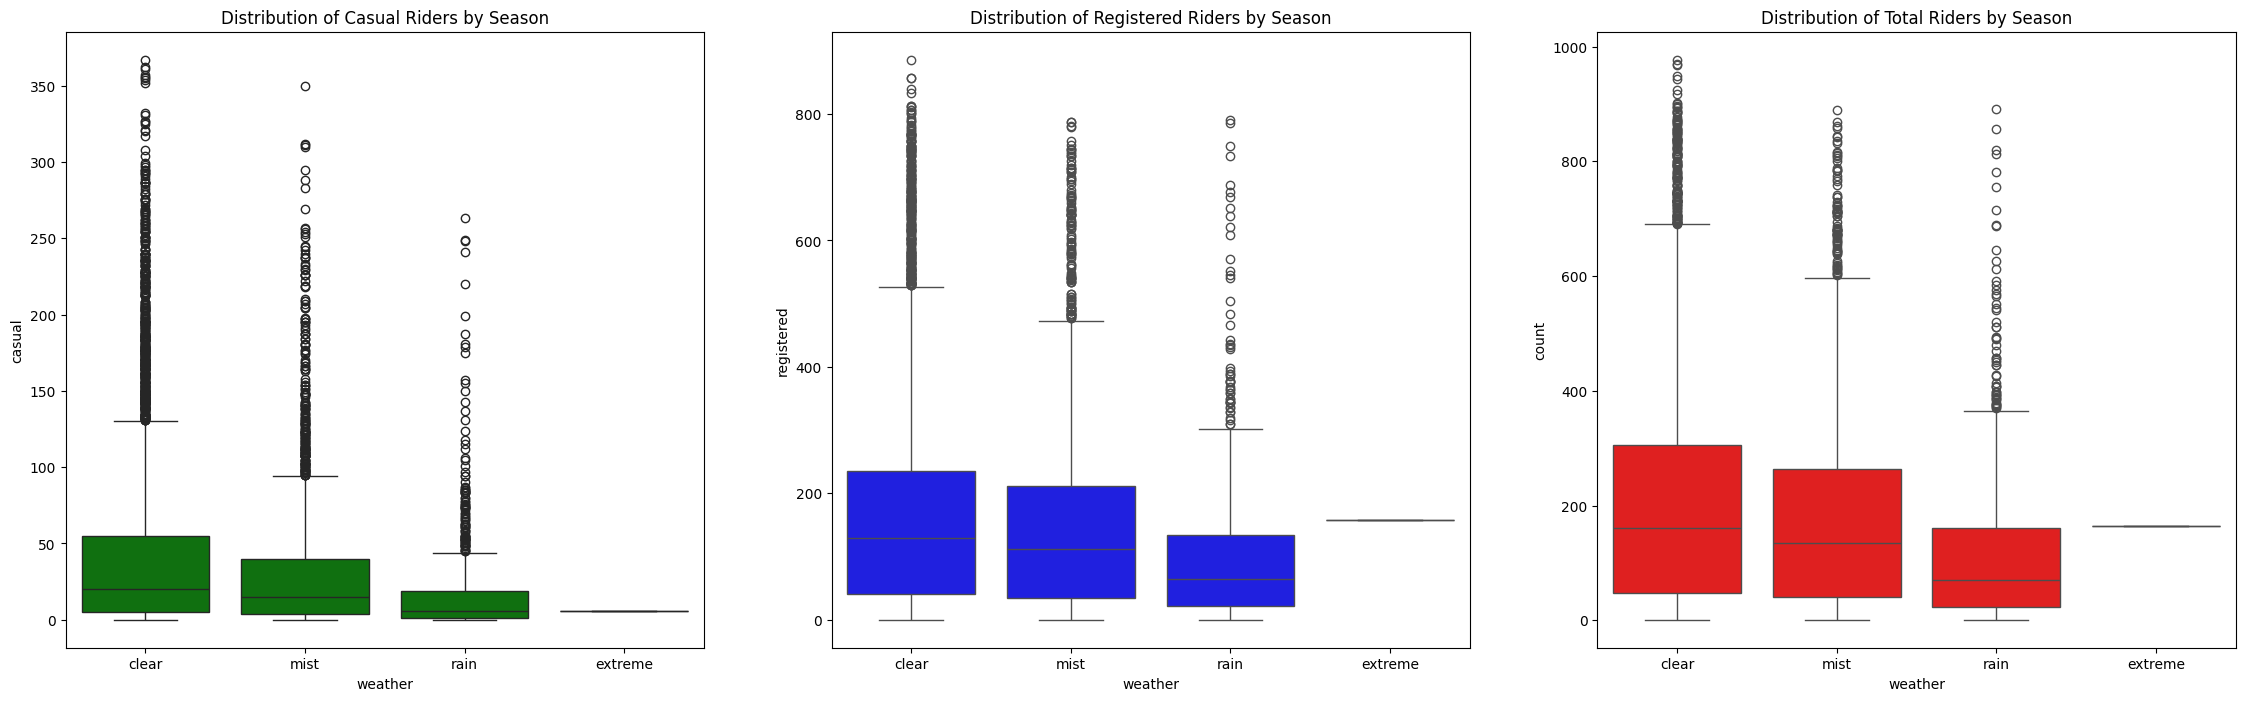

In [31]:
fig,axes=plt.subplots(1,3,figsize=(28,8))

sns.boxplot(data=yulu, y="casual", x = 'weather', ax=axes[0], color = "green")
axes[0].set_title('Distribution of Casual Riders by Season')

sns.boxplot(data=yulu, y="registered", x = 'weather', ax=axes[1], color = "blue")
axes[1].set_title('Distribution of Registered Riders by Season')

sns.boxplot(data=yulu, y="count", x = 'weather', ax=axes[2], color = "red")
axes[2].set_title('Distribution of Total Riders by Season')

plt.show()

**Observations:**

1. All riders, whether casual or Registered, used Yulu services for ride during clear weather followed by misty weather.
2. Notable that during extreme or heavy rains, Yulu services took a hit with near-zero ridership but also noted that registered riders preferred to ride even during rains and was high compared to casual riders.

**D. Multi-variate Analysis**

1. Distribution of Casual, Registered and Total Riders by Weather and Season

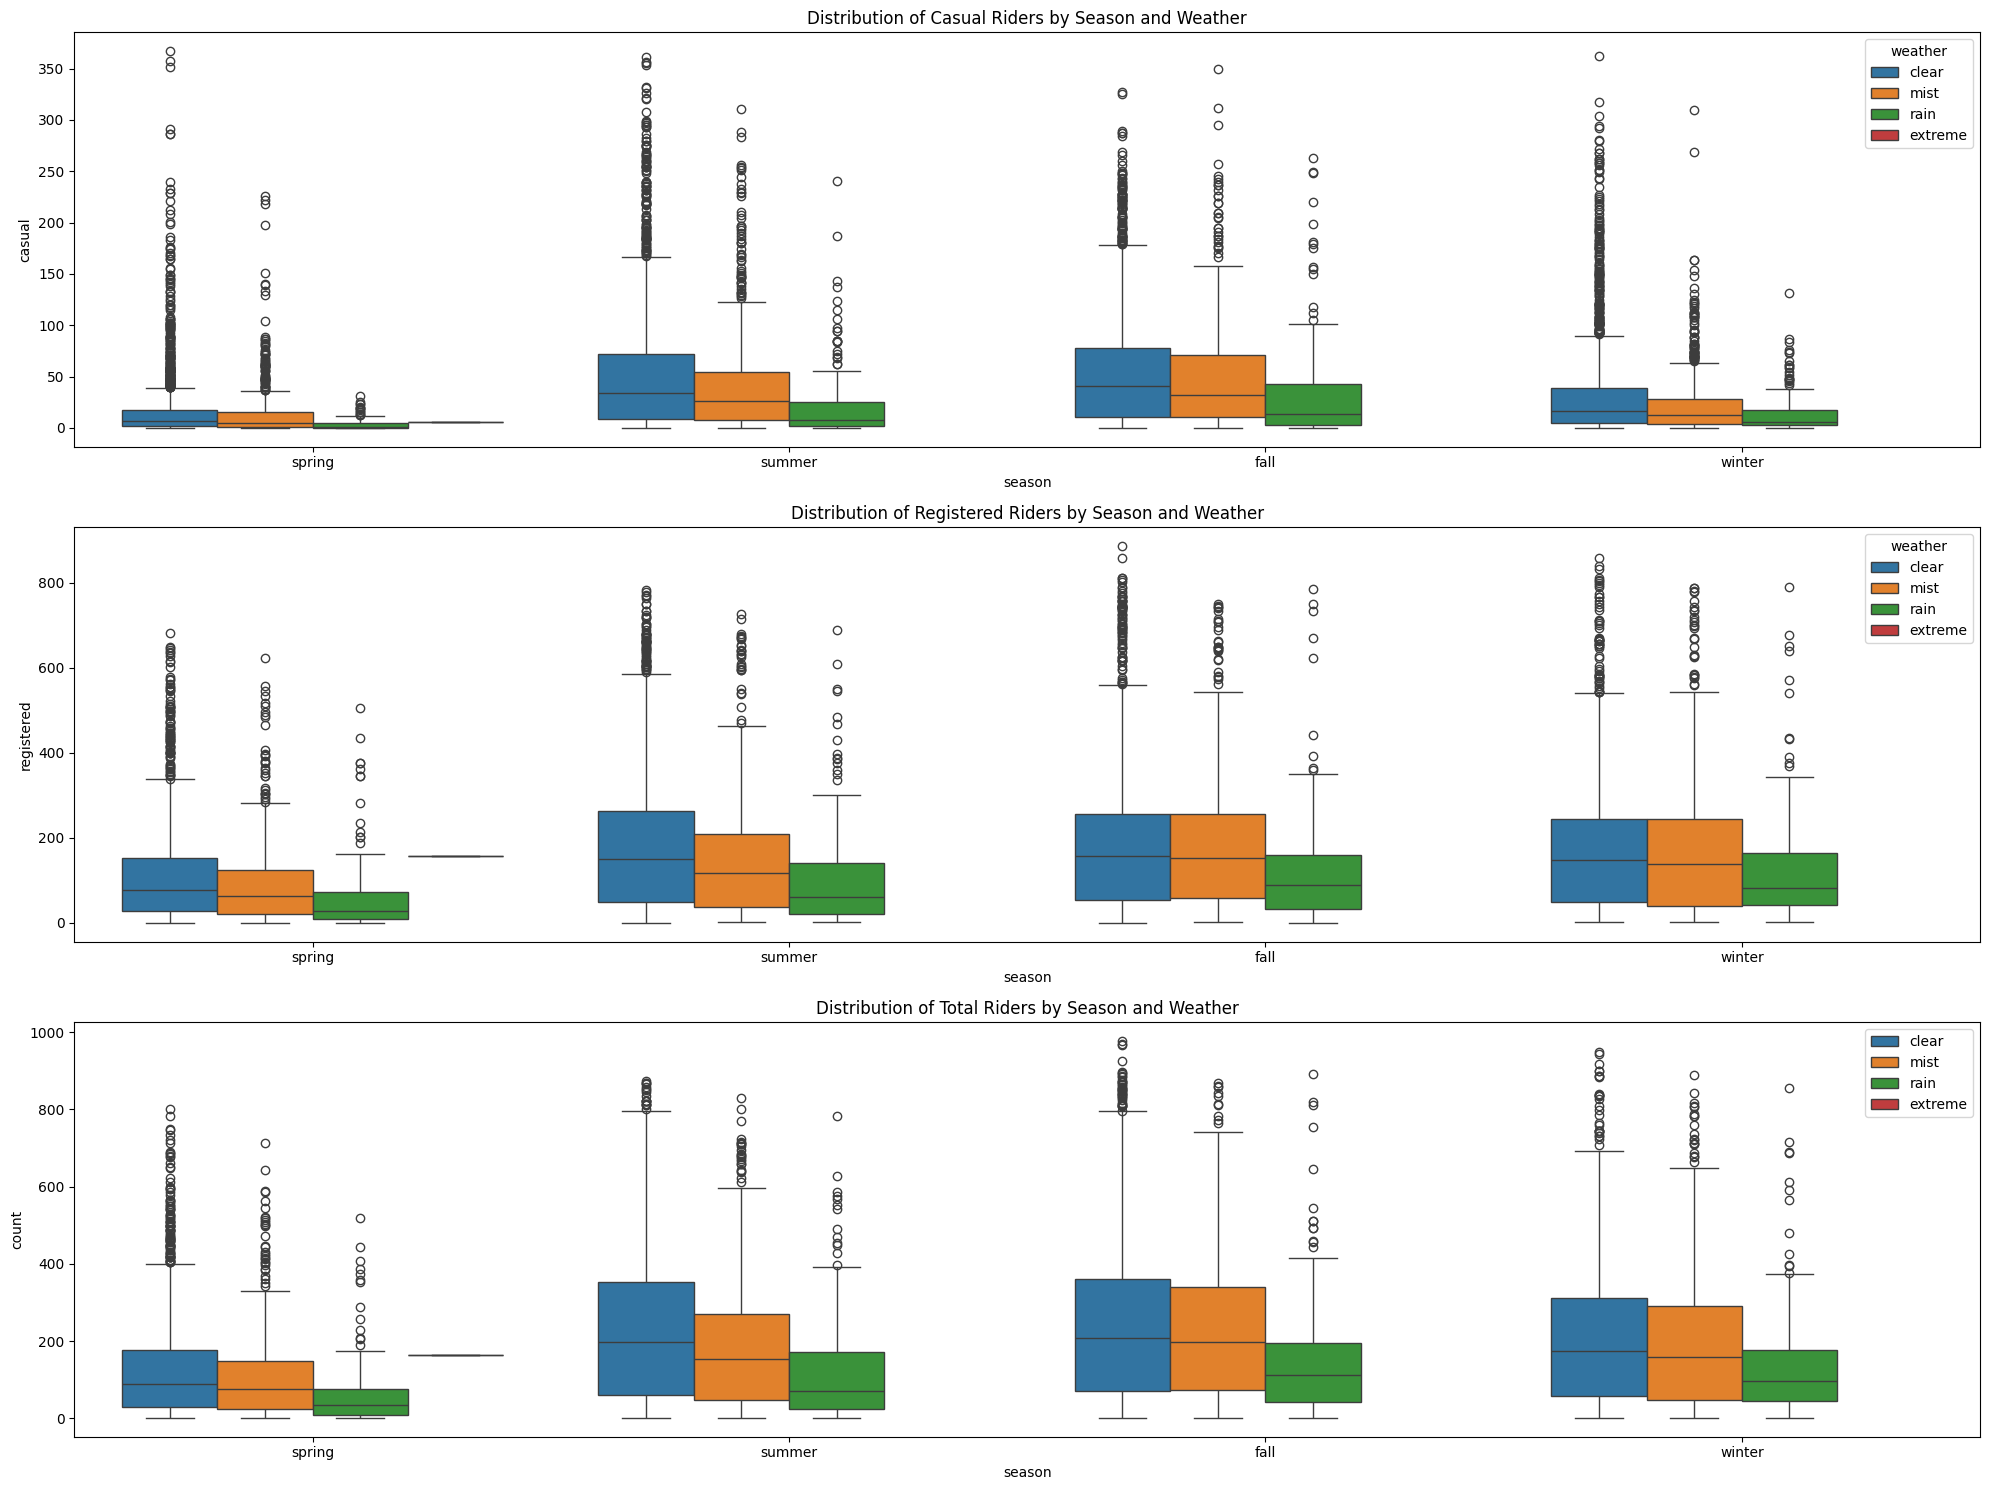

In [32]:
fig,axes=plt.subplots(3,1,figsize=(20,15))

sns.boxplot(data=yulu, y="casual", x = 'season', hue = 'weather', ax=axes[0])
axes[0].set_title('Distribution of Casual Riders by Season and Weather')

sns.boxplot(data=yulu, y="registered", x = 'season', hue = 'weather', ax=axes[1])
axes[1].set_title('Distribution of Registered Riders by Season and Weather')

sns.boxplot(data=yulu, y="count", x = 'season', hue = 'weather', ax=axes[2])
axes[2].set_title('Distribution of Total Riders by Season and Weather')

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

**Observations:**

1. It is noted that extreme weather ridership is mostly in spring season.
2. Ridership is stable or normal during clear & mist weather, whereas it is lowest during rainy season.

**E. Correlation among Different Factors**

In [33]:
yulu_corr = yulu.corr()
yulu_corr

<ipython-input-33-626c302ccc73>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  yulu_corr = yulu.corr()


,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


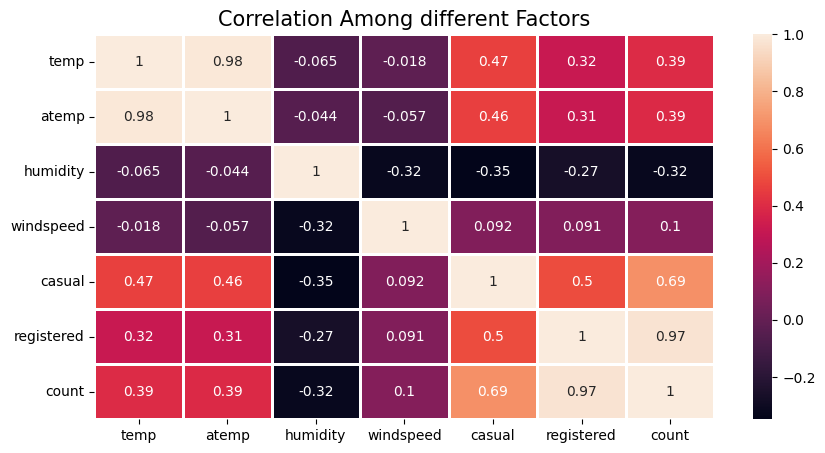

In [34]:
plt.figure(figsize=(10,5))
plt.title('Correlation Among different Factors', fontsize = 15)
sns.heatmap(data = yulu_corr, annot = True, linewidths = 1, linecolor = "white")
plt.show()

**Observations:**

1. Strong Correlation:
  - temp with Casual riders is higher (0.47) then Registered riders (0.32)
2. Weak Correlation:   
  - Humidity has a negative correlation with both Casual & Registered riders, which means decrease in no. of riders during high humid climate.
  - Wind Speed  again has lower correlation between casual and registered riders.


# **3. Relationship between Dependent and Independent Variables**

**A. Effect of Working day on number of electric cycles rented**

Let us first set-up the hypothesis framework

Ho: Working Day has no effect on the number of electric cycles rented

H1: Working Day has effect on the number of electric cycles rented

Significance Level(α): 0.10 or 10%

Test Statistic: Two Sample T-test

In [35]:
import scipy.stats as stats

In [36]:
workingday_no = np.array(yulu[yulu["workingday"]=="no"]['count'])
workingday_no

array([ 16,  40,  32, ..., 106,  89,  33])

In [37]:
workingday_yes = np.array(yulu[yulu["workingday"]=="yes"]["count"])
workingday_yes

array([  5,   2,   1, ..., 168, 129,  88])

In [38]:
stats.ttest_ind(a = workingday_no, b = workingday_yes, equal_var = True)

TtestResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348, df=10884.0)

**Observations:**

1. Since, pvalue(0.22) is greater than Significance Level(α) i.e 0.10, we fail to reject the null hypothesis (H0) that - working day has no effect on the number of electric cycles rented.
2. This implies that at even at 90% confidence level, the mean of number of riders on non-working day is statistically not different from the mean number of riders on working day.

**B. Effect of Holiday on number of electric cycles rented**

Let us first set-up the hypothesis framework

H0: Holiday has no effect on the number of electric cycles rented

H1: Holiday has effect on the number of electric cycles rented

Significance Level(α): 0.10 or 10%

Test Statistic: Two Sample T-test

In [39]:
holiday_no = np.array(yulu[yulu["holiday"]=="no"]['count'])
holiday_no

array([ 16,  40,  32, ..., 168, 129,  88])

In [40]:
holiday_yes = np.array(yulu[yulu["holiday"]=="yes"]['count'])
holiday_yes

array([ 17,  16,   8,   2,   3,   1,   5,  13,  33,  47,  57,  64,  80,
        93,  86,  93,  82,  71,  92,  60,  33,  27,  13,   4,  27,  15,
        18,   3,   3,  13,  47, 149, 300, 178, 122, 136, 200, 180, 163,
       162, 243, 331, 263, 209, 118, 102,  80,  64, 140, 119,  63,  26,
        12,   4,  16,  36,  86, 238, 280, 349, 447, 423, 408, 408, 452,
       436, 418, 375, 386, 457, 326, 138,  97,  54,  39,  16,   8,   6,
        11,  41, 101, 152, 244, 308, 353, 389, 357, 253, 284, 114, 123,
       175,  82,  60,  64,  20,  53,  34,  19,  11,   6,  21,  44, 114,
       254, 219, 265, 322, 365, 365, 370, 384, 402, 459, 473, 336, 225,
       175, 126,  75,  66,  19,  11,   6,   8,  13,  46, 121, 258, 201,
       200, 170, 239, 236, 247, 216, 238, 310, 208, 199, 109,  83,  91,
        73,  39,  12,   7,   4,   4,  14,  16,  53,  68, 109, 175, 202,
       176, 151, 168, 154, 153, 126,  93,  88,  66,  39,  34,  25,  20,
        17,   3,   8,   6,  13,  33,  78,  96, 126, 179, 185, 22

In [41]:
stats.ttest_ind(a = holiday_no, b = holiday_yes, equal_var = True)

TtestResult(statistic=0.5626388963477119, pvalue=0.5736923883271103, df=10884.0)

**Observations:**

1. Since, pvalue(0.57) is greater than Significance Level(α) i.e 0.10, we fail to reject the null hypothesis (H0) that - Holiday has no effect on the number of electric cycles rented.
2. This implies that at even at 90% confidence level, the mean of number of riders on Non-holiday is statistically not different from the mean number of riders on Holiday.

**C. Number of cycles rented similar or different in different seasons**

Let us first set-up the hypothesis framework

H0: Season has no effect on the number of electric cycles rented

H1: Season has effect on the number of electric cycles rented

Significance Level(α): 0.10 or 10%

Test Statistic: One way ANOVA

In [42]:
yulu["season"].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [43]:
season_spring = np.array(yulu[yulu["season"]=="spring"]["count"])
season_spring

array([ 16,  40,  32, ..., 223, 148,  54])

In [44]:
season_summer = np.array(yulu[yulu["season"]=="summer"]["count"])
season_summer

array([  6,   4,   7, ..., 276, 291, 125])

In [45]:
season_fall = np.array(yulu[yulu["season"]=="fall"]["count"])
season_fall

array([ 68,  31,  13, ..., 349, 229, 123])

In [46]:
season_winter = np.array(yulu[yulu["season"]=="winter"]["count"])
season_winter

array([130,  58,  67, ..., 168, 129,  88])

Let us calculate -

- dfn - Degree of freedom for all seasons
- dfd - degree of freedom for all datapoints in all seasons

In [47]:
total_seasons = 4
dfn = total_seasons - 1
dfn

3

In [48]:
dfd = len(season_spring) - 1 + len(season_summer) - 1 + len(season_fall) - 1 + len(season_winter) - 1
dfd

10882

Critical Region at 90% confidence interval

In [49]:
from scipy.stats import f

In [50]:
critical_region = f.ppf(0.90, dfn = dfn, dfd = dfd)
critical_region

2.0842990773596353

Let us now calculate the f-statistic based on data points

In [51]:
from scipy.stats import f_oneway

In [52]:
f_oneway(season_spring, season_summer, season_fall, season_winter)

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

**Observations:**

1. Since, pvalue(6.164843386499654e-149) is lesser than Significance Level(α) i.e 0.10, we reject the null hypothesis that - season has no effect on the number of electric cycles rented.
2. This implies that at 90% confidence level, H1: Season has effect on the number of electric cycles rented

**D. Number of cycles rented similar or different in different weather**

Let us first set-up the hypothesis framework

H0: Weather has no effect on the number of electric cycles rented

H1: Weather has effect on the number of electric cycles rented

Significance Level(α): 0.10 or 10%

Test Statistic: One way ANOVA

In [53]:
yulu["weather"].unique()

array(['clear', 'mist', 'rain', 'extreme'], dtype=object)

In [54]:
weather_clear = np.array(yulu[yulu["weather"]=="clear"]["count"])
weather_clear

array([ 16,  40,  32, ..., 168, 129,  88])

In [55]:
weather_mist = np.array(yulu[yulu["weather"]=="mist"]["count"])
weather_mist

array([  1,  94, 106, ...,  18,  15,   7])

In [56]:
weather_rain = np.array(yulu[yulu["weather"]=="rain"]["count"])
weather_rain

array([ 35,  37,   2,   8,  59,  74,  76,   5,   7,   1,  15,  20,  95,
        51,  32,  20,  29,  19,  60,  33,  27,  13,   4,   7,   3,   2,
         3,  22,  52, 135,  16,   2,   3,   4,   1,   1,   3,  18,  49,
       155,   8,   9,   4,   4,  10,  20,  34,  47,  52,  72,  55,  60,
        71,   1,  88,  84,  46,  37,  16,   7,   3,   5,  39,   7,  11,
        25,  23,  11,  11,   7,   4,   2,  21,  18,   3,   2,   1,   3,
        12,  37,  44,  24,  17,  11,  34,  12,  12,  14,  21,  82,  56,
        38,  28,  27,   8,   5,  55,   8,   3,   6,   4,   7,  12,  28,
        95, 184, 190, 136,  79,  15,   2,   5, 157,  46,  28,  19,  13,
         1, 113, 221,  80,  42,  15,  25, 148,  62,  53,  14,   3,  54,
       226,  54,  40, 106, 291, 224,   2,   2,   3,   5,  34,  70, 164,
        95,  10,  45,  29,  22,  31,  58,  63,  78,  33,  15,  53,  24,
       162,  27,   7,   4,   1,   3,   9,  21,  52,  79,  40, 470, 292,
       378, 351,   5,  82, 157, 491, 398, 119,  32,  88, 279, 24

In [57]:
weather_extreme = np.array(yulu[yulu["weather"]=="extreme"]["count"])
weather_extreme

array([164])

Let us calculate -

- dfn - Degree of freedom for all seasons
- dfd - degree of freedom for all datapoints in all seasons

In [58]:
total_weather = 4
dfn = total_weather - 1
dfn

3

In [59]:
dfd = len(weather_clear) - 1 + len(weather_mist) - 1 + len(weather_rain) - 1 + len(weather_extreme) - 1
dfd

10882

Critical Region at 90% confidence interval

In [60]:
critical_region = f.ppf(0.90, dfn=dfn, dfd=dfd)
critical_region

2.0842990773596353

Let us now calculate the f-statistic based on data points

In [61]:
f_oneway(weather_clear, weather_mist, weather_rain, weather_extreme)

F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

**Observations:**

1. Since, pvalue(5.482069475935669e-42) is lesser than Significance Level(α) i.e 0.10, we reject the null hypothesis that - weather has no effect on the number of electric cycles rented.
2. This implies that at 95% confidence level, H1: Weather has effect on the number of electric cycles rented

**E. Dependency of Weather on Seasons**

Let us first set-up the hypothesis framework

H0: Weather is independent on season

H1: Weather is dependent on season

Significance Level(α): 0.10 or 10%

Test Statistic: Chi-Square Test of Independence

In [62]:
yulu_sw = pd.crosstab(index = yulu["weather"], columns = yulu["season"], margins = True)
yulu_sw

season,fall,spring,summer,winter,All
weather,,,,,
clear,1930,1759,1801,1702,7192
extreme,0,1,0,0,1
mist,604,715,708,807,2834
rain,199,211,224,225,859
All,2733,2686,2733,2734,10886


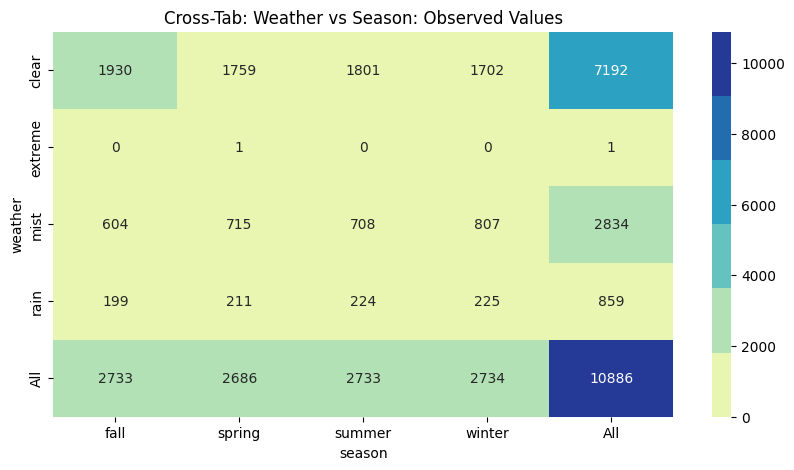

In [63]:
plt.figure(figsize = (10, 5))

colormap = sns.color_palette("YlGnBu")

plt.title('Cross-Tab: Weather vs Season: Observed Values')
sns.heatmap(data = yulu_sw, annot = True, fmt = "d", cmap = colormap)
plt.show()

**Please Note:** We need to remove data points for extreme weather conditions as for Chi-Square Test of Independence - The expected value inside each cell needs to be at least five in order for you to use this test.

In [64]:
yulu_sw = yulu[yulu["weather"] != "extreme"]
yulu_sw = pd.crosstab(index=yulu_sw["weather"], columns=yulu_sw["season"], margins=True)
yulu_sw

season,fall,spring,summer,winter,All
weather,,,,,
clear,1930,1759,1801,1702,7192
mist,604,715,708,807,2834
rain,199,211,224,225,859
All,2733,2685,2733,2734,10885


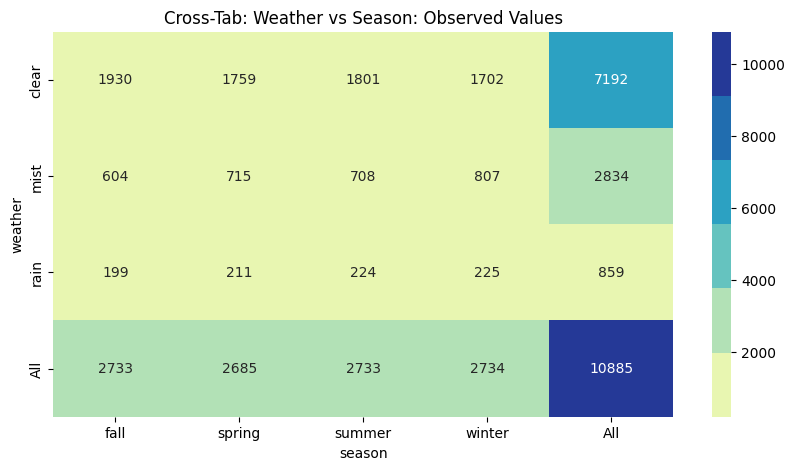

In [65]:
plt.figure(figsize = (10, 5))

colormap = sns.color_palette("YlGnBu")

plt.title('Cross-Tab: Weather vs Season: Observed Values')
sns.heatmap(data = yulu_sw, annot = True, fmt = "d", cmap = colormap)
plt.show()

Critical Region at 90% confidence interval

In [66]:
from scipy.stats import chi2

In [67]:
chi2.ppf(q = 0.90, df = 6)

10.644640675668422

Let us now calculate the χ2-Statistic based on data points

In [68]:
from scipy.stats import chi2_contingency

In [69]:
observed = [[1930, 1759, 1801, 1702],
            [604, 715, 708, 807],
            [199, 211, 224, 225]]

In [70]:
chi2_contingency(observed)

Chi2ContingencyResult(statistic=46.101457310732485, pvalue=2.8260014509929403e-08, dof=6, expected_freq=array([[1805.76352779, 1774.04869086, 1805.76352779, 1806.42425356],
       [ 711.55920992,  699.06201194,  711.55920992,  711.81956821],
       [ 215.67726229,  211.8892972 ,  215.67726229,  215.75617823]]))

**Observations:**

1. Since, pvalue(2.8260014509929403e-08) is lesser than Significance Level(α) i.e 0.10, we reject the null hypothesis that - weather is independent of season.
2. This implies that at 95% confidence level, H1: Weather is dependent on season

# **4. Test of Normality**

**A. Histogram**

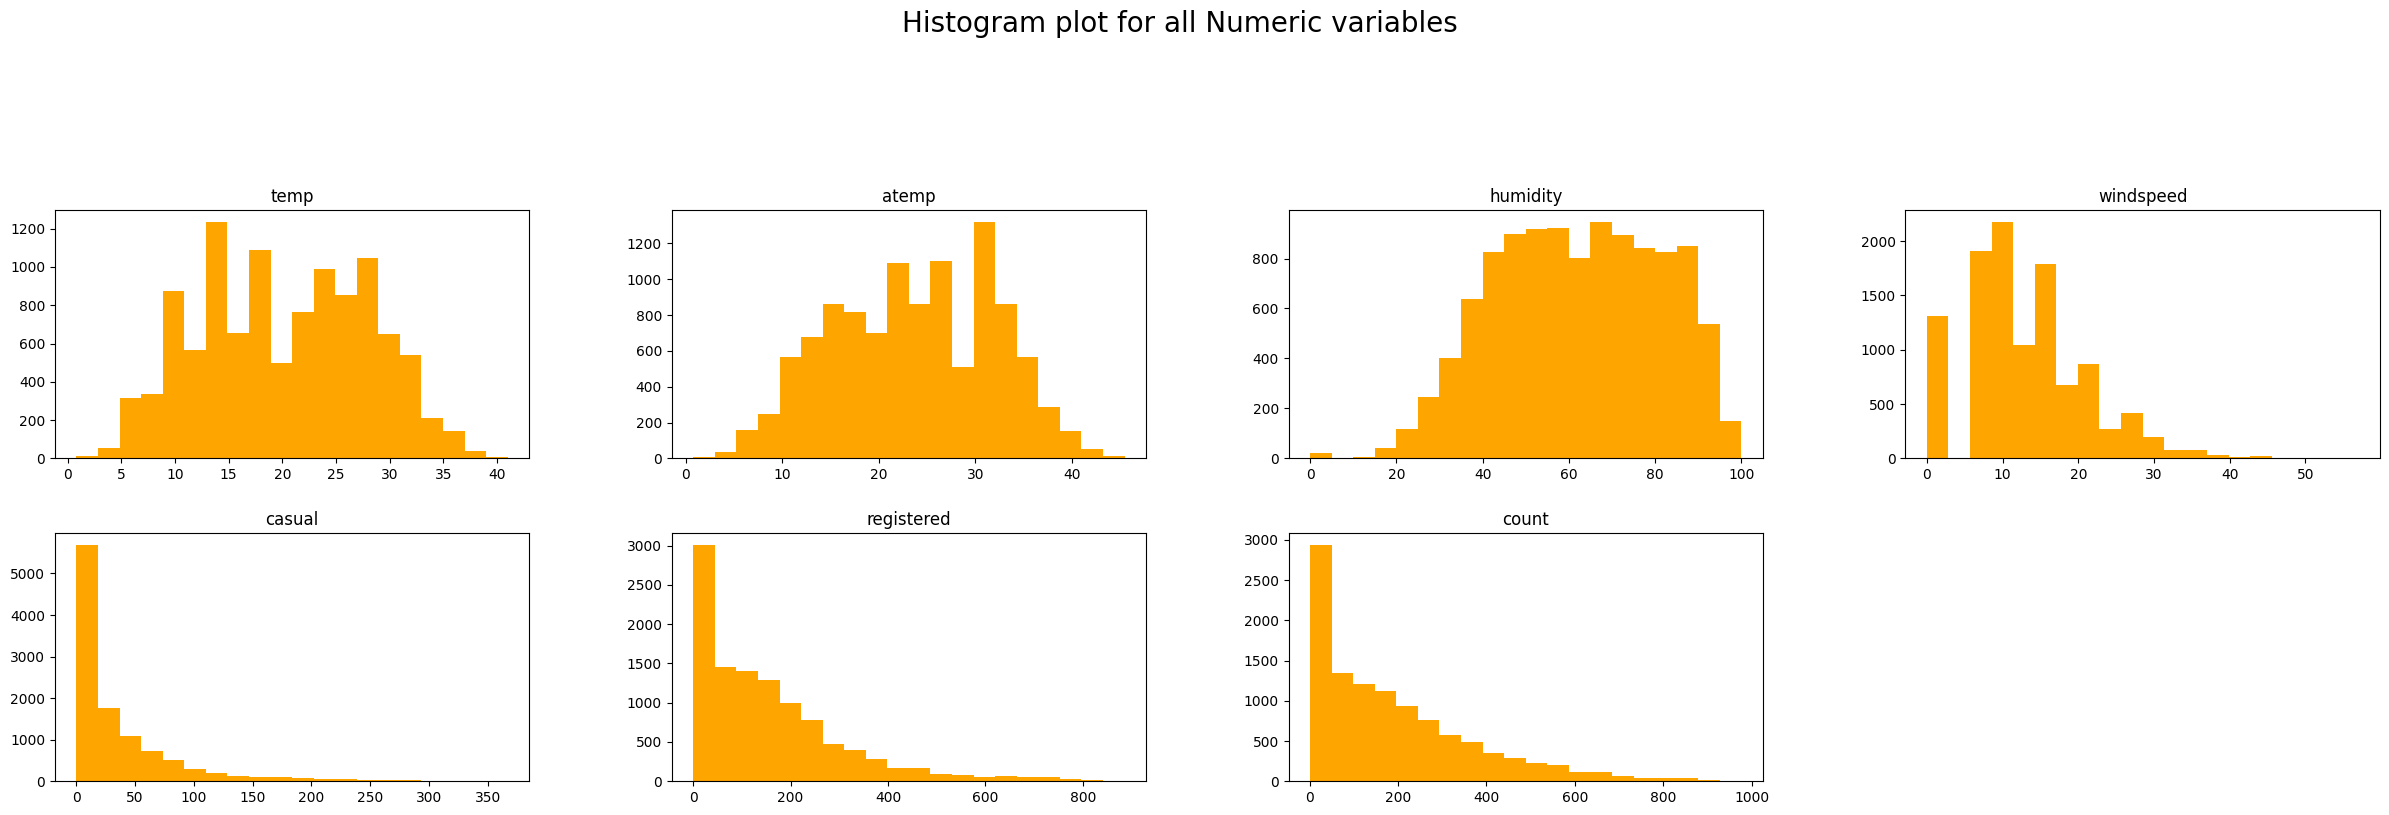

In [71]:
yulu_hist = yulu[["temp", "atemp", "humidity","windspeed","casual","registered","count"]]
yulu_hist.hist(layout = (5,4), figsize = (30,20), grid = False, bins = 20, color = "orange")

plt.suptitle("Histogram plot for all Numeric variables", fontsize = 20)
plt.show()

**Observations:**

1. temp, atemp, humidity has bit normalization of data with some distortion.
2. windspeed, casual riders, registered riders are highly left skewed.

**B. Q-Q Plot**

In [72]:
import pylab
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot

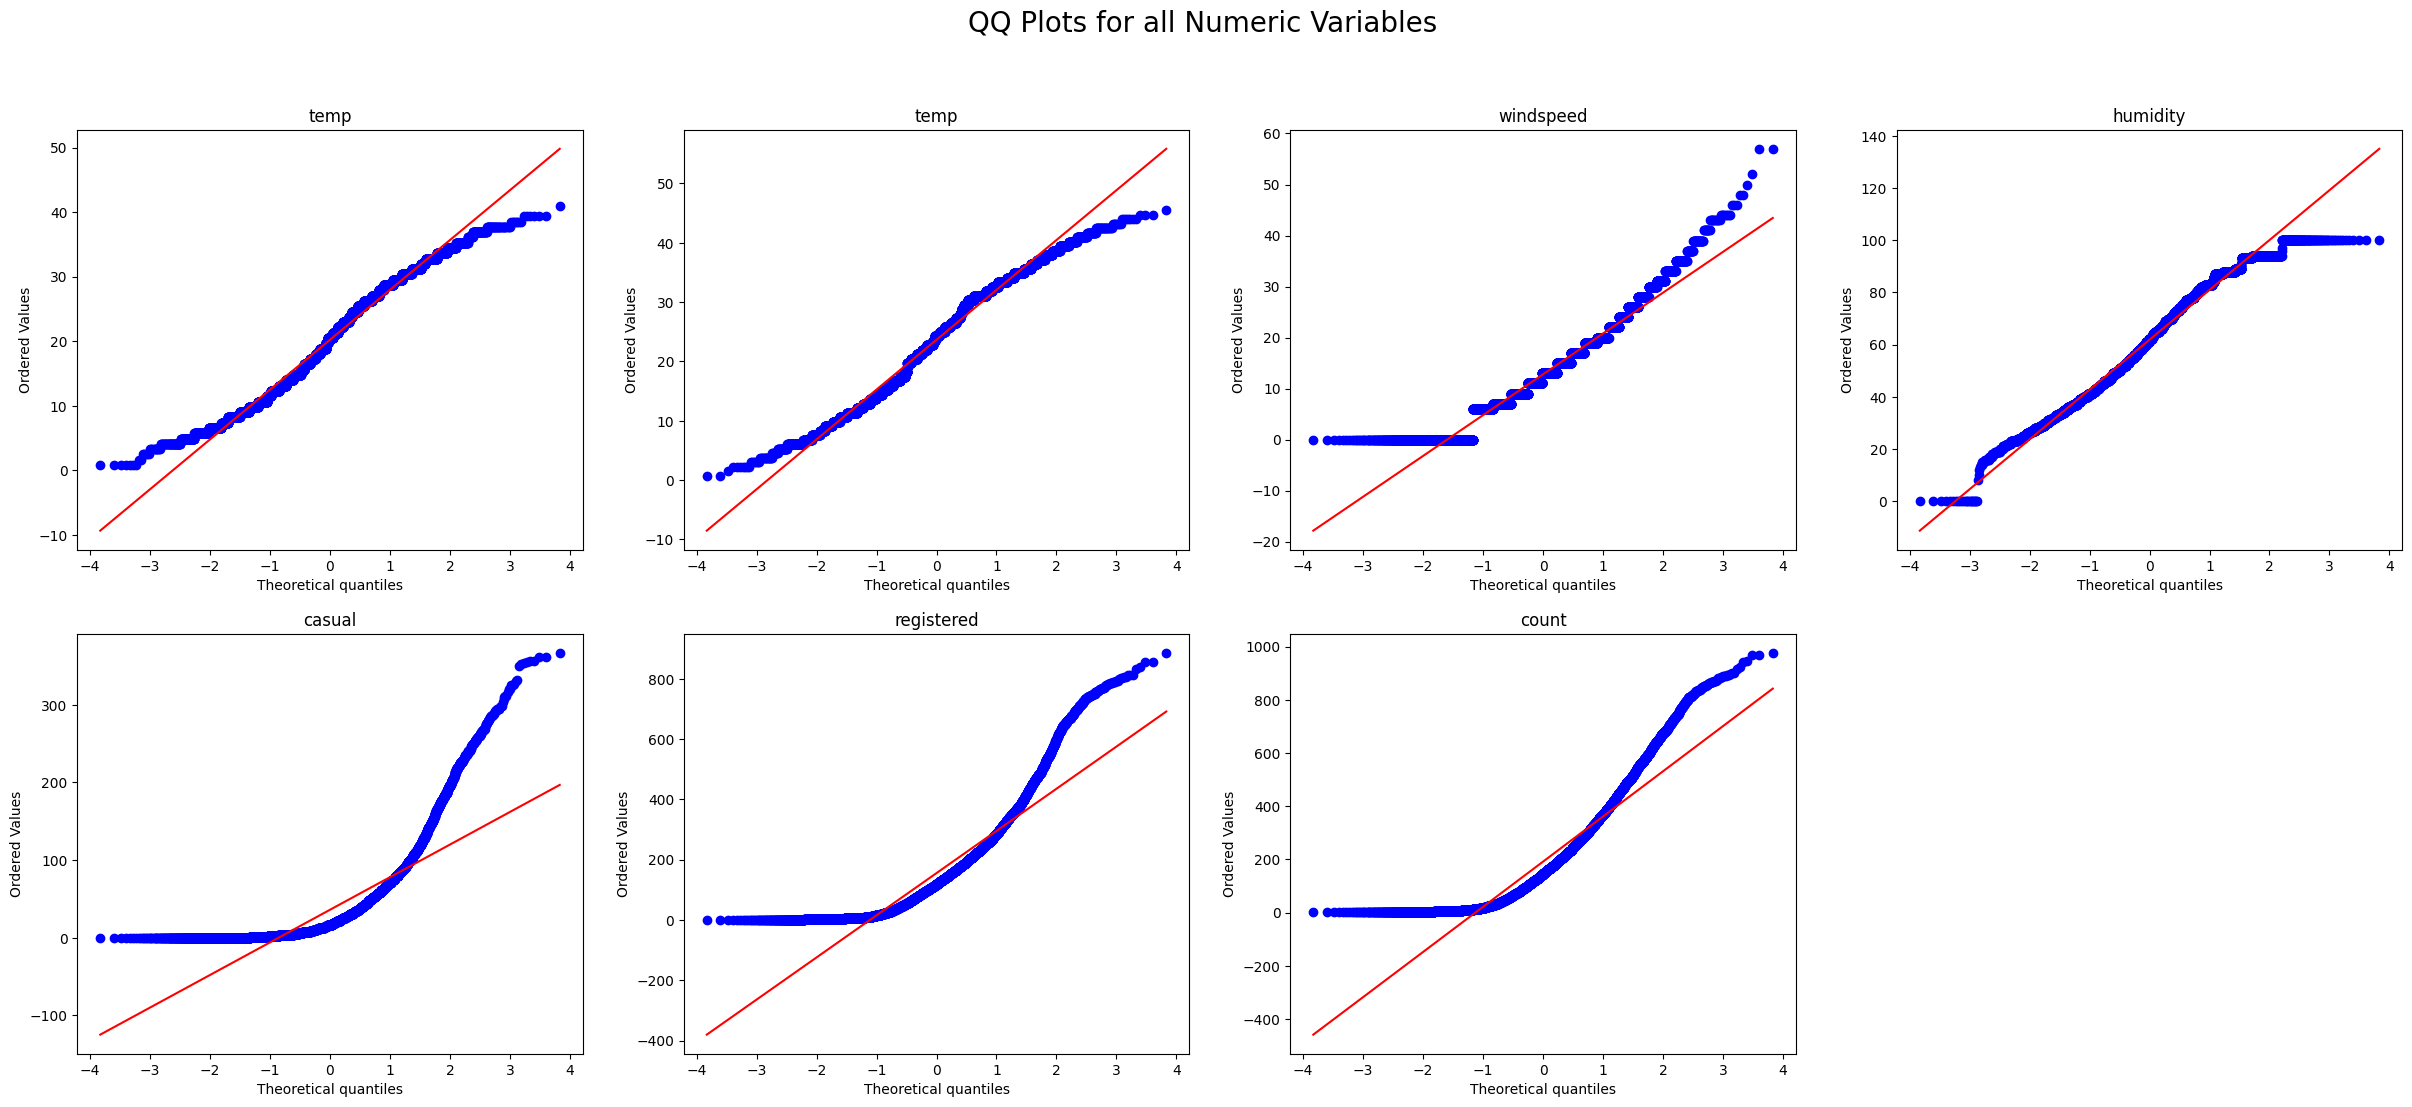

In [84]:
plt.figure(figsize=(30,12))

ax1 = plt.subplot(241)
res = stats.probplot(yulu_hist['temp'], dist="norm", plot=plt)
ax1 = plt.title('temp')

ax2 = plt.subplot(242)
res = stats.probplot(yulu_hist['atemp'], dist="norm", plot=plt)
ax2 = plt.title('temp')

ax3 = plt.subplot(243)
res = stats.probplot(yulu_hist['windspeed'], dist="norm", plot=plt)
ax3 = plt.title('windspeed')

ax4 = plt.subplot(244)
res = stats.probplot(yulu_hist['humidity'], dist="norm", plot=plt)
ax4 = plt.title('humidity')

ax5 = plt.subplot(245)
res = stats.probplot(yulu_hist['casual'], dist="norm", plot=plt)
ax5 = plt.title('casual')

ax6 = plt.subplot(246)
res = stats.probplot(yulu_hist['registered'], dist="norm", plot=plt)
ax6 = plt.title('registered')

ax7 = plt.subplot(247)
res = stats.probplot(yulu_hist['count'], dist="norm", plot=plt)
ax7 = plt.title('count')

plt.suptitle('QQ Plots for all Numeric Variables', fontsize = 20)
plt.show()

**Observations:**

1. From the QQ-Plot we observe that none of the variables is looking straight, hence showing deviation from normal distribution. Data in the numerical columns is normally distributed.

**C. Levene's Test**

**a. Levene's Test for equality of variance for number of riders for 4 different seasons**

Assumption:

Samples collected from the population are independent of each other

The population data is approximately normal in distribution

**Setting up Hypothesis Framework**

H0: Variance is equal for all seasons

H1: Variance is not equal for all seasons (atleast one of the season has a variance different from the others)

Significance Level(α): 0.05 or 5%

Levene's Test-Statistic: As the data for all the seasons is skewed in distribution, we will use the median for test statistics.

In [85]:
from scipy.stats import levene

In [89]:
levene(season_spring, season_summer, season_fall, season_winter, center = "median")

LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)

**Observation:**

1. Since, pvalue(1.0147116860043298e-118) is lesser than Significance Level(α) i.e 0.05, we reject the null hypothesis that - Variance is equal for all seasons.
2. This implies that at 95% confidence level, Variance is not equal for all seasons, H1: Variance is not equal for all seasons (atleast one of the season has a variance different from the others)

**b. Levene's Test for equality of variance for number of riders for 4 different weather**

Assumption:

Samples collected from the population are independent of each other

The population data is approximately normal in distribution

**Setting up Hypothesis Framework**

H0: Variance is equal for all weathers

H1: Variance is not equal for all weathers (atleast one of the weather has a variance different from the others)

Significance Level(α): 0.05 or 5%

Levene's Test-Statistic: As the data for all the weathers is skewed in distribution, we will use the median for test statistics.

In [90]:
levene(weather_clear, weather_mist, weather_rain, weather_extreme, center = "median")

LeveneResult(statistic=54.85106195954556, pvalue=3.504937946833238e-35)

**Observations:**

1. Since, pvalue(3.504937946833238e-35) is lesser than Significance Level(α) i.e 0.05, we reject the null hypothesis that - Variance is equal for all seasons

2. This implies that at 95% confidence level, Variance is not equal for all seasons, H1: Variance is not equal for all weathers (atleast one of the weather has a variance different from the others)

**c. Levene's Test for equality of variance for number of riders as per working day**

Assumption:

Samples collected from the population are independent of each other

The population data is approximately normal in distribution

**Setting up Hypothesis Framework**

H0: Variance is equal irrespective of working day or not

H1: Variance is not equal irrespective of working day or not

Significance Level(α): 0.05 or 5%

Levene's Test-Statistic: As the data for workingday or not is skewed in distribution, we will use the median for test statistics.

In [92]:
levene(workingday_no, workingday_yes, center ='median')

LeveneResult(statistic=0.004972848886504472, pvalue=0.9437823280916695)

**Observations:**

1. Since, pvalue(0.9437823280916695) is greater than Significance Level(α) i.e 0.05, we fail to reject the null hypothesis that - Variance is equal irrespective of whether it is a working day
or not.
2. This implies that at 95% confidence level, H0: Variance is equal irrespective of working day or not

**d. Levene's Test for equality of variance for number of riders as per Holiday**

Assumption:

Samples collected from the population are independent of each other

The population data is approximately normal in distribution

**Setting up Hypothesis Framework**

H0: Variance is equal irrespective of holiday or not

H1: Variance is not equal irrespective of holiday or not

Significance Level(α): 0.05 or 5%

Levene's Test-Statistic: As the data for holiday is skewed in distribution, we will use the median for test statistics.

In [94]:
levene(holiday_no , holiday_yes, center = "median"),

(LeveneResult(statistic=1.222306875221986e-06, pvalue=0.9991178954732041),)

**Observations:**

1. Since, pvalue(0.9991178954732041) is greater than Significance Level(α) i.e 0.05, we fail to reject the null hypothesis that - Variance is equal irrespective of whether it is a holiday or not.
2. This implies that at 95% confidence level, H0: Variance is equal irrespective of holiday or not

**C. Shapiro Wilk Test**

**Shapiro-Wilk Test is used to test Normality.**

Assumption: The sample is coming from a normal distribution

**Setting up Hypothesis Framework**

H0: Sample comes from a normal distribution

H1: Sample is not coming from a population which is normally distributed

Significance Level(α): 0.05 or 5%

In [95]:
from scipy.stats import shapiro

In [98]:
print('Insights:')
print(end = '\n')

for i in list(yulu_hist.columns):
  test_statistic, p_value = stats.shapiro(yulu_hist[i])

  print('********************************************************************************************')

  print(f'The test-statistic for {i} is {test_statistic} with p_value {p_value}')

  if p_value > 0.05:
    print('Hence at 95% confidence level, we fail to reject null hypothesis')
    print(f'Hence we can say that {i} is coming from normally distributed population')

  else:
    print('Hence at 95% confidence level, we reject null hypothesis')
    print(f'Hence we can say that {i} is not coming from normally distributed population')

  print('********************************************************************************************')
  print(end = '\n')

Insights:

********************************************************************************************
The test-statistic for temp is 0.9804227352142334 with p_value 4.577117001754969e-36
Hence at 95% confidence level, we reject null hypothesis
Hence we can say that temp is not coming from normally distributed population
********************************************************************************************

********************************************************************************************
The test-statistic for atemp is 0.9815532565116882 with p_value 3.35599504562436e-35
Hence at 95% confidence level, we reject null hypothesis
Hence we can say that atemp is not coming from normally distributed population
********************************************************************************************

********************************************************************************************
The test-statistic for humidity is 0.9822683930397034 with p_value 1.244270413072

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# **Recommendations:**

1. As from 2 Sample T-test we have seen that **Holiday** has no impact on the number of riders at 90% confidence level, Yulu should run similar promotional-campaigns/offers irrespective of whether it is a holiday or not.

2. As from 2 Sample T-test we have seen that **Working day** has no impact on the number of riders at 90% confidence level, Yulu should run similar promotional-campaigns/offers irrespective of whether it is a working day or not.

3. As we have seen from Analysis of **Variance(ANOVA)**, that mean number of riders is statistically different at 90% confidence level for different **seasons**, Yulu should have different strategies for different **seasons**. Yulu should try to increase the riders in the months of fall and winter when the number of riders goes down considerably and maximize capacity utilization of e-bikes in the months of summer and fall.

4. As we have seen from Analysis of **Variance(ANOVA)**, that mean number of riders is statistically different at 95% confidence level for different **weathers**, Yulu should have different strategies for different **weathers**. Yulu should try to maximize the capacity utilization of e-bikes when the weather is clear or partly clear.

5. As we have seen from **Chi-Square Test** that weather is dependent on seasons at 95% confidence level. Yulu should maximize the capacity utilization or rides in every season when the weather is clear or partly_clear.

6. Yulu should perform demand forecasting as we have seen that there is trend and seasonality  in the data. Better demand forecasting will lead to better capacity utilization of e-bikes in different seasons.

7. Yulu should also perform further investigation into the riders based on gender and age as insights into age bracket and gender would reveal a lot about the week on week capacity utilization on the type of customers preferring Yulu e-bikes.